In [32]:
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

In [33]:
import os 
os.chdir('F:/BigContest_NOVUS/NOVUS_Futures/Preprocessing')

In [34]:
# PIT
pit_HT = pd.read_csv('./noma/noma_HT.csv')
pit_HH = pd.read_csv('./noma/noma_HH.csv')
pit_KT = pd.read_csv('./noma/noma_KT.csv')
pit_LG = pd.read_csv('./noma/noma_LG.csv')
pit_LT = pd.read_csv('./noma/noma_LT.csv')
pit_NC = pd.read_csv('./noma/noma_NC.csv')
pit_OB = pd.read_csv('./noma/noma_OB.csv')
pit_SK = pd.read_csv('./noma/noma_SK.csv')
pit_SS = pd.read_csv('./noma/noma_SS.csv')
pit_WO = pd.read_csv('./noma/noma_WO.csv')

In [16]:
pit_HT.head()

,Unnamed: 0,GDAY_DS,ER,WLS
0,1,2020-05-05,11,0.000
1,2,2020-05-06,2,0.000
2,3,2020-05-07,5,0.333
3,4,2020-05-08,4,0.250
4,5,2020-05-09,13,0.200


In [35]:
# ER
er_HT = pit_HT.iloc[:,[1,2]]
er_HH = pit_HH.iloc[:,[1,2]]
er_KT = pit_KT.iloc[:,[1,2]]
er_LG = pit_LG.iloc[:,[1,2]]
er_LT = pit_LT.iloc[:,[1,2]]
er_NC = pit_NC.iloc[:,[1,2]]
er_OB = pit_OB.iloc[:,[1,2]]
er_SK = pit_SK.iloc[:,[1,2]]
er_SS = pit_SS.iloc[:,[1,2]]
er_WO = pit_WO.iloc[:,[1,2]]
er_WO.head()

,GDAY_DS,ER
0,2020-05-05,0
1,2020-05-06,2
2,2020-05-07,8
3,2020-05-08,3
4,2020-05-09,3


In [36]:
# WLS
wls_HT = pit_HT.iloc[:,[1,3]]
wls_HH = pit_HH.iloc[:,[1,3]]
wls_KT = pit_KT.iloc[:,[1,3]]
wls_LG = pit_LG.iloc[:,[1,3]]
wls_LT = pit_LT.iloc[:,[1,3]]
wls_NC = pit_NC.iloc[:,[1,3]]
wls_OB = pit_OB.iloc[:,[1,3]]
wls_SK = pit_SK.iloc[:,[1,3]]
wls_SS = pit_SS.iloc[:,[1,3]]
wls_WO = pit_WO.iloc[:,[1,3]]

In [347]:
wls_HT.loc[:,'WLS']

0      0.000
1      0.000
2      0.333
3      0.250
4      0.200
       ...  
104    0.611
105    0.667
106    0.667
107    0.722
108    0.667
Name: WLS, Length: 109, dtype: float64

In [37]:
# HIT
hit_HT = pd.read_csv('./hit/hit_HT.csv')
hit_HH = pd.read_csv('./hit/hit_HH.csv')
hit_KT = pd.read_csv('./hit/hit_KT.csv')
hit_LG = pd.read_csv('./hit/hit_LG.csv')
hit_LT = pd.read_csv('./hit/hit_LT.csv')
hit_NC = pd.read_csv('./hit/hit_NC.csv')
hit_OB = pd.read_csv('./hit/hit_OB.csv')
hit_SK = pd.read_csv('./hit/hit_SK.csv')
hit_SS = pd.read_csv('./hit/hit_SS.csv')
hit_WO = pd.read_csv('./hit/hit_WO.csv')
hit_WO.head()

FileNotFoundError: [Errno 2] File ./hit/hit_HT.csv does not exist: './hit/hit_HT.csv'

In [7]:
# BA
ba_HT = hit_HT.iloc[:,[1,2]]
ba_HH = hit_HH.iloc[:,[1,2]]
ba_KT = hit_KT.iloc[:,[1,2]]
ba_LG = hit_LG.iloc[:,[1,2]]
ba_LT = hit_LT.iloc[:,[1,2]]
ba_NC = hit_NC.iloc[:,[1,2]]
ba_OB = hit_OB.iloc[:,[1,2]]
ba_SK = hit_SK.iloc[:,[1,2]]
ba_SS = hit_SS.iloc[:,[1,2]]
ba_WO = hit_WO.iloc[:,[1,2]]
ba_WO.head()

,GDAY_DS,BA
0,2020-05-05,0.316
1,2020-05-06,0.271
2,2020-05-07,0.269
3,2020-05-08,0.275
4,2020-05-09,0.249


## acf & pacf

<IPython.core.display.Javascript object>


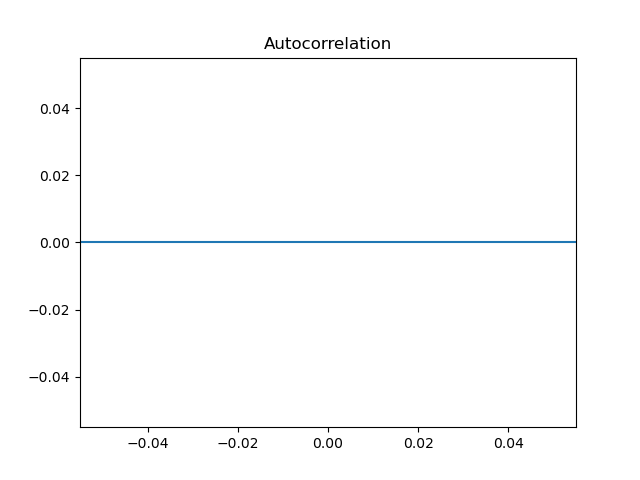

<IPython.core.display.Javascript object>


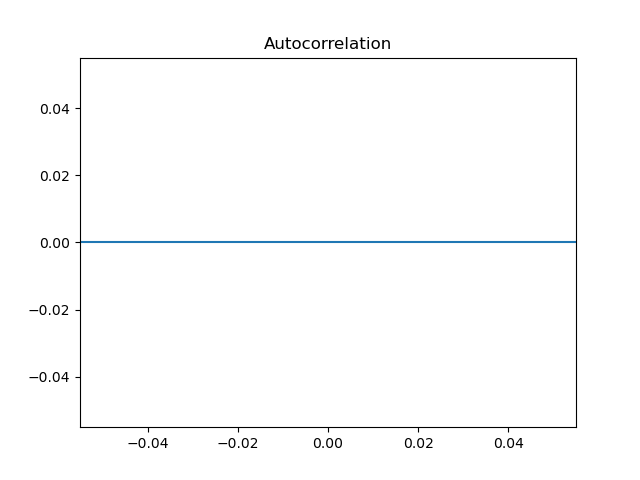

In [25]:
plot_acf(er_HH.loc[:,['ER']].diff())

## ER ARIMA

--ER-- <br>
한화 1,2,1 // 2,0,1 <br>
기아 1,2,1 // 1,1,2<br>
kt 0,1,0 // 0,1,0 <br>
lg 1,1,0  // 1,0,2 <br>
롯데 1,0,0 // 1,0,0 <br> 
nc 0,2,1 // 2,1,0 <br>
두산 2,1,1 // 2,1,1 <br>
sk 1,0,1 // 0,1,1  <br>
삼성 1,0,0 // 0,1,0 <br>
키움 0,1,1 // 1,0,1 

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
erHH_model = ARIMA(er_HH.loc[:64,['ER']], order=(0,0,0))
erHH_model_fit = erHH_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erHH_model_fit.summary()))

test = er_HH.loc[65:,['ER']]
fore = erHH_model_fit.forecast(steps=len(er_HH.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_HH.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   65
Model:                     ARMA(0, 0)   Log Likelihood                -169.559
Method:                           css   S.D. of innovations              3.286
Date:                Fri, 25 Sep 2020   AIC                            343.118
Time:                        00:24:11   BIC                            347.467
Sample:                             0   HQIC                           344.834
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3077      0.408     13.023      0.000       4.509       6.107



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   63
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -28.051
Method:                           css   S.D. of innovations              0.378
Date:                Thu, 24 Sep 2020   AIC                             60.103
Time:                        21:07:11   BIC                             64.389
Sample:                             1   HQIC                            61.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0362      0.048     -0.760      0.447      -0.129       0.057

(array([4.68584127]), array([0.37769036]), array([[3.94558177, 5.42610077]]))


<IPython.core.display.Javascript object>


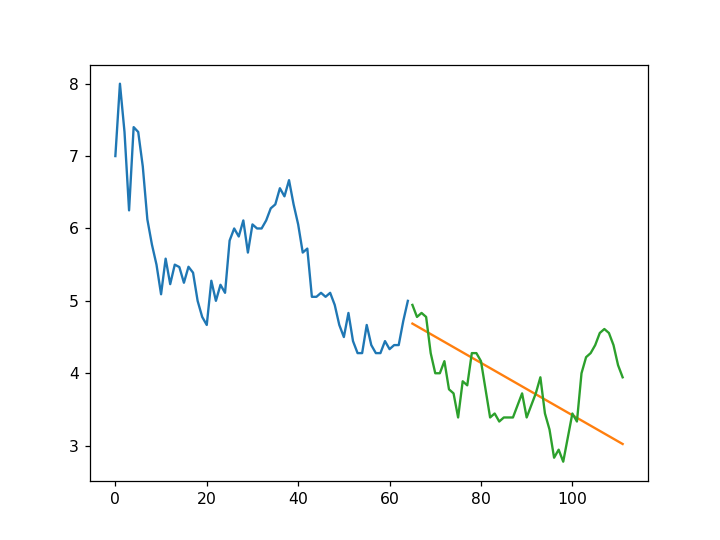

In [13]:
erKT_model = ARIMA(er_KT.loc[:63, ['ER']], order=(0,1,0))
erKT_model_fit = erKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erKT_model_fit.summary()))

erKT_fore = erKT_model_fit.forecast(steps=1)
print(erKT_fore)

test = er_KT.loc[65:,['ER']]
fore = erKT_model_fit.forecast(steps=len(er_KT.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_KT.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

<IPython.core.display.Javascript object>


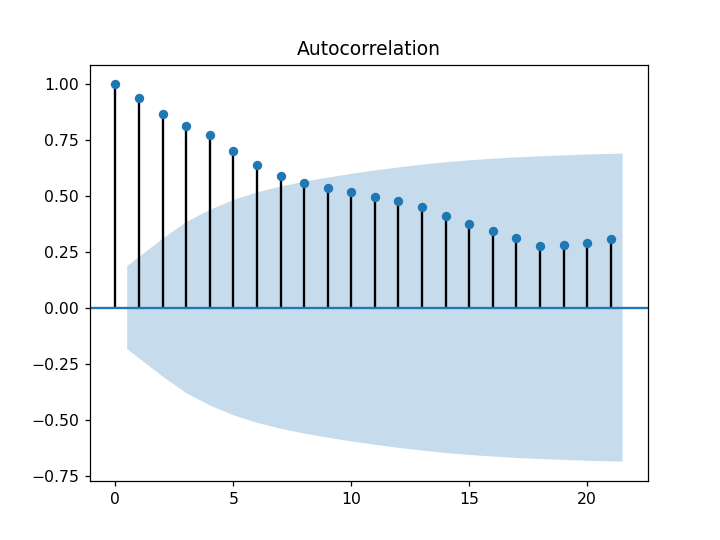

<IPython.core.display.Javascript object>


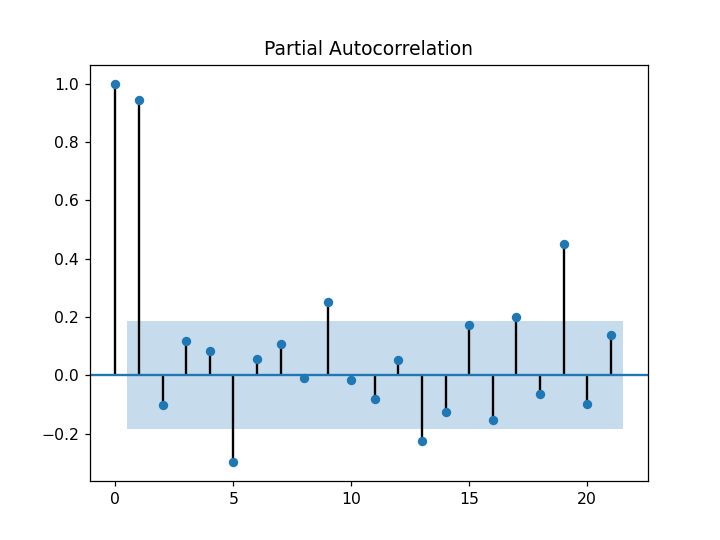

<IPython.core.display.Javascript object>


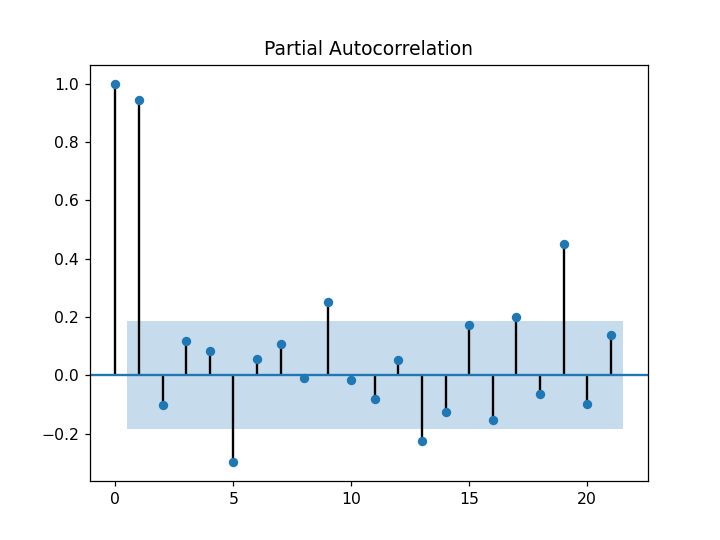

In [28]:
kter_diff = er_KT.loc[:,['ER']].diff()

plot_acf(er_KT.loc[:,['ER']])
plot_pacf(er_KT.loc[:,['ER']])

In [11]:
# 꼴떼 1,0,0//
erLT_model = ARIMA(er_LT.loc[:61, ['ER']], order=(1, 0, 0))
erLT_model_fit = erLT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erLT_model_fit.summary()))

test = er_LT.loc[65:,['ER']]
fore = erLT_model_fit.forecast(steps=len(er_LT.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_LT.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   62
Model:                     ARMA(1, 0)   Log Likelihood                 -29.575
Method:                       css-mle   S.D. of innovations              0.384
Date:                Thu, 24 Sep 2020   AIC                             65.150
Time:                        21:02:35   BIC                             71.531
Sample:                             0   HQIC                            67.655
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2757      0.520      8.216      0.000       3.256       5.296
ar.L1.ER       0.9155      0.064     14.382      0.000       0.791       1.040
                                    Roots           

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -29.110
Method:                       css-mle   S.D. of innovations              0.381
Date:                Thu, 24 Sep 2020   AIC                             64.220
Time:                        19:58:10   BIC                             70.697
Sample:                             1   HQIC                            66.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.1876      0.138      1.361      0.173      -0.083       0.458
ar.L2.D.ER     0.2473      0.138      1.792      0.073      -0.023       0.518
                                    Roots           

<IPython.core.display.Javascript object>


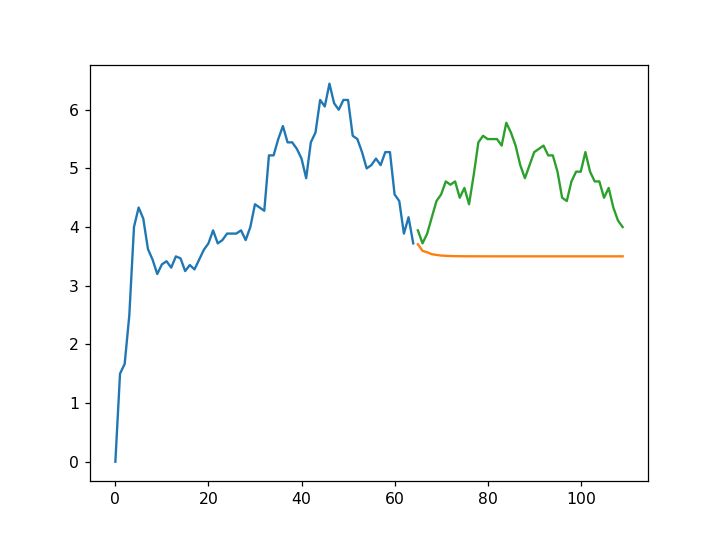

In [21]:
erNC_model = ARIMA(er_NC.loc[:64,['ER']], order=(2,1,0)) #정상성떄문에 2,0,1 -> 2,1,1 변경
erNC_model_fit = erNC_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erNC_model_fit.summary()))

test = er_NC.loc[65:,['ER']]
fore = erNC_model_fit.forecast(steps=len(er_NC.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_NC.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -43.907
Method:                       css-mle   S.D. of innovations              0.472
Date:                Thu, 24 Sep 2020   AIC                             95.814
Time:                        19:58:23   BIC                            104.449
Sample:                             1   HQIC                            99.216
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.6835      0.174      3.935      0.000       0.343       1.024
ar.L2.D.ER    -0.7896      0.123     -6.397      0.000      -1.031      -0.548
ma.L1.D.ER    -0.5664      0.139     -4.068      0.0

<IPython.core.display.Javascript object>


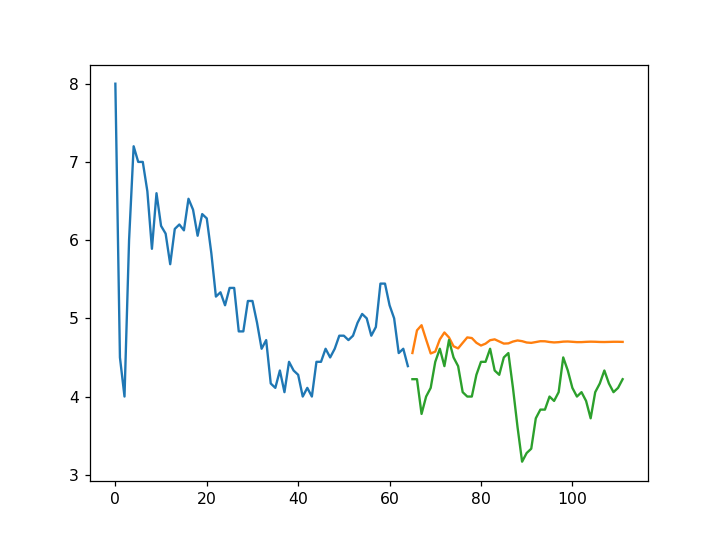

In [22]:
erOB_model = ARIMA(er_OB.loc[:64,['ER']], order=(2,1,1))
erOB_model_fit = erOB_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erOB_model_fit.summary()))

test = er_OB.loc[65:,['ER']]
fore = erOB_model_fit.forecast(steps=len(er_OB.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_OB.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -27.365
Method:                       css-mle   S.D. of innovations              0.371
Date:                Thu, 24 Sep 2020   AIC                             58.730
Time:                        19:58:39   BIC                             63.047
Sample:                             1   HQIC                            60.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.ER     0.1110      0.154      0.721      0.471      -0.191       0.413
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


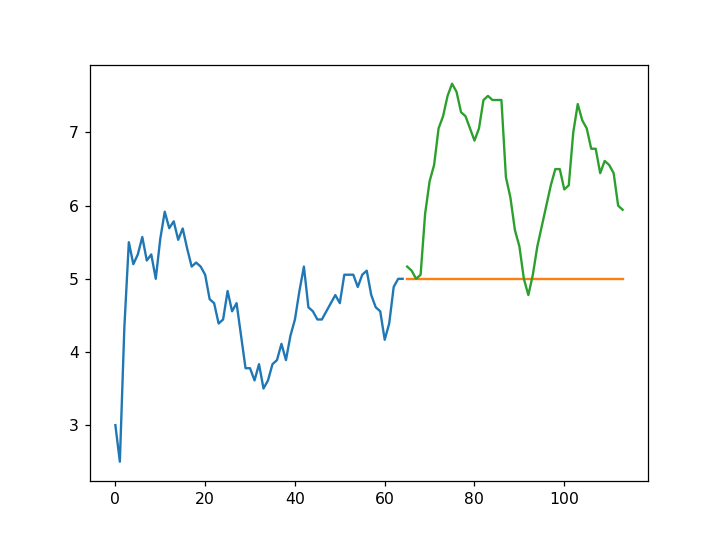

In [23]:
erSK_model = ARIMA(er_SK.loc[:64,['ER']], order=(0,1,1))
erSK_model_fit = erSK_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erSK_model_fit.summary()))

test = er_SK.loc[65:,['ER']]
fore = erSK_model_fit.forecast(steps=len(er_SK.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SK.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -20.852
Method:                           css   S.D. of innovations              0.335
Date:                Thu, 24 Sep 2020   AIC                             45.703
Time:                        19:58:56   BIC                             50.021
Sample:                             1   HQIC                            47.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.042      0.228      0.820      -0.073       0.092



<IPython.core.display.Javascript object>


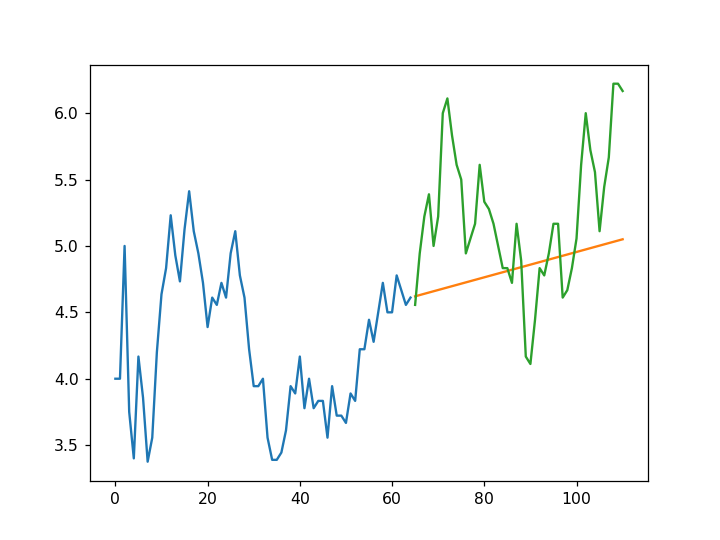

In [24]:
erSS_model = ARIMA(er_SS.loc[:64,['ER']], order=(0,1,0))
erSS_model_fit = erSS_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erSS_model_fit.summary()))

test = er_SS.loc[65:,['ER']]
fore = erSS_model_fit.forecast(steps=len(er_SS.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SS.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   65
Model:                     ARMA(2, 2)   Log Likelihood                -164.837
Method:                       css-mle   S.D. of innovations              2.934
Date:                Fri, 25 Sep 2020   AIC                            341.673
Time:                        00:37:30   BIC                            354.720
Sample:                             0   HQIC                           346.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6694      0.385     12.114      0.000       3.914       5.425
ar.L1.ER       0.2389      0.029      8.337      0.000       0.183       0.295
ar.L2.ER      -0.9892      0.013    -73.723      0.0

<IPython.core.display.Javascript object>


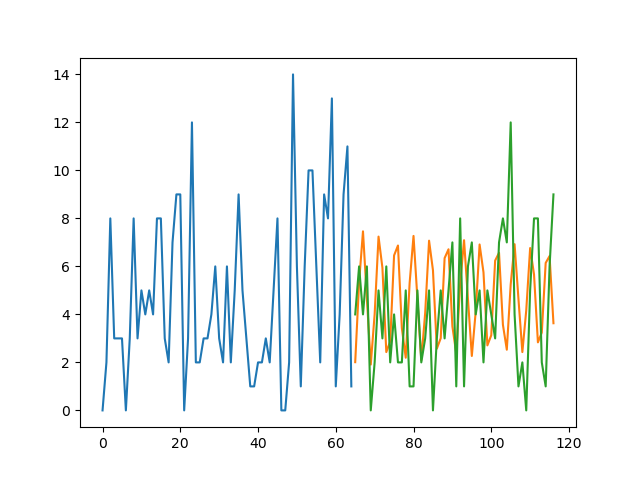

In [38]:
erWO_model = ARIMA(er_WO.loc[:64,['ER']], order=(2,0,2))
erWO_model_fit = erWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erWO_model_fit.summary()))

test = er_WO.loc[65:,['ER']]
fore = erWO_model_fit.forecast(steps=len(er_WO.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_WO.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

## WLS

--WLS-- <br>
한화 1,2,1 <br>
기아 0,1,0 <br>
KT 0,1,0 <br>
엘지 0,1,3 <br>
롯데 0,1,0 <br>
NC 0,1,0 <br>
두산 0,0,1 <br>
SK 0,1,0 <br>
삼성 2,1,2 <br>
키움 1,0,0 <br>


In [27]:
# 한화 승률 1,2,1/3,0,2
wlsHH_model = ARIMA(wls_HH.loc[:64, ['WLS']], order=(3,0,2))
wlsHH_model_fit = wlsHH_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsHH_model_fit.summary()))

wlsHH_fore = wlsHH_model_fit.forecast(steps=1)
print(wlsHH_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   65
Model:                     ARMA(3, 2)   Log Likelihood                  81.591
Method:                       css-mle   S.D. of innovations              0.064
Date:                Thu, 24 Sep 2020   AIC                           -149.183
Time:                        01:31:13   BIC                           -133.962
Sample:                             0   HQIC                          -143.177
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4315      0.194      2.222      0.026       0.051       0.812
ar.L1.WLS      0.2568      0.150      1.717      0.086      -0.036       0.550
ar.L2.WLS      0.1735      0.163      1.067      0.2

<IPython.core.display.Javascript object>


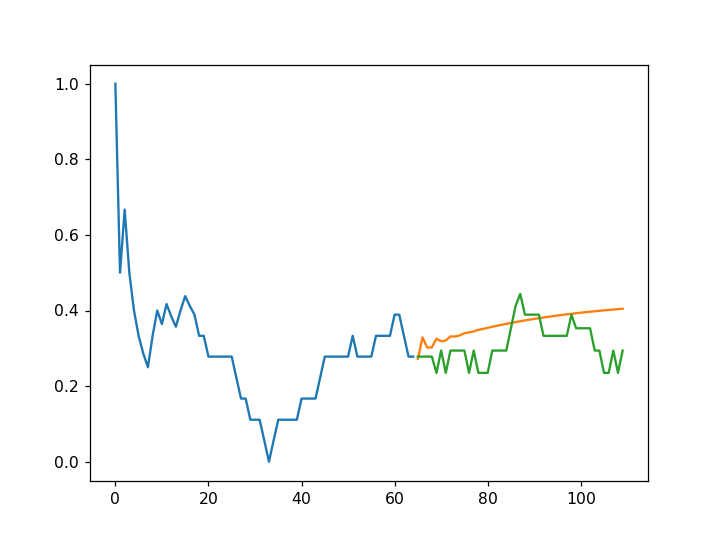

In [28]:
test = wls_HH.loc[65:,['WLS']]
fore = wlsHH_model_fit.forecast(steps=len(wls_HH.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_HH.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [30]:
# 기아 0,1,0 // 
wlsHT_model = ARIMA(wls_HT.loc[:61, ['WLS']], order=(0, 1, 0))
wlsHT_model_fit = wlsHT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsHT_model_fit.summary()))

wlsHT_fore = wlsHT_model_fit.forecast(steps=1)
print(wlsHT_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  82.894
Method:                           css   S.D. of innovations              0.062
Date:                Thu, 24 Sep 2020   AIC                           -161.788
Time:                        01:31:25   BIC                           -157.566
Sample:                             1   HQIC                          -160.134
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.008      1.030      0.303      -0.007       0.024

(array([0.50819672]), array([0.06217158]), array([[0.38634266, 0.63005078]]))


<IPython.core.display.Javascript object>


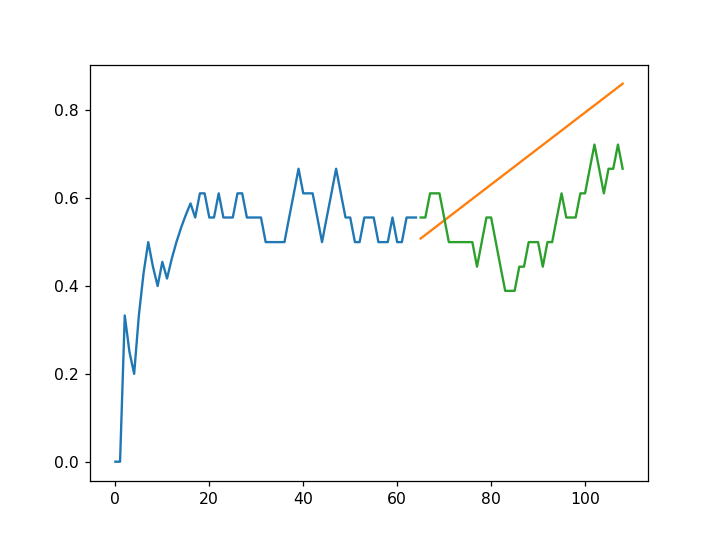

In [31]:
test = wls_HT.loc[65:,['WLS']]
fore = wlsHT_model_fit.forecast(steps=len(wls_HT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_HT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [33]:
wlsKT_model = ARIMA(wls_KT.loc[:63, ['WLS']], order=(0, 1, 0))
wlsKT_model_fit = wlsKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsKT_model_fit.summary()))

wlsKT_fore = wlsKT_model_fit.forecast(steps=1)
print(wlsKT_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   63
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  97.427
Method:                           css   S.D. of innovations              0.052
Date:                Thu, 24 Sep 2020   AIC                           -190.855
Time:                        01:31:37   BIC                           -186.569
Sample:                             1   HQIC                          -189.169
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.006      1.582      0.114      -0.002       0.023

(array([0.65726984]), array([0.05153954]), array([[0.5562542 , 0.75828548]]))


<IPython.core.display.Javascript object>


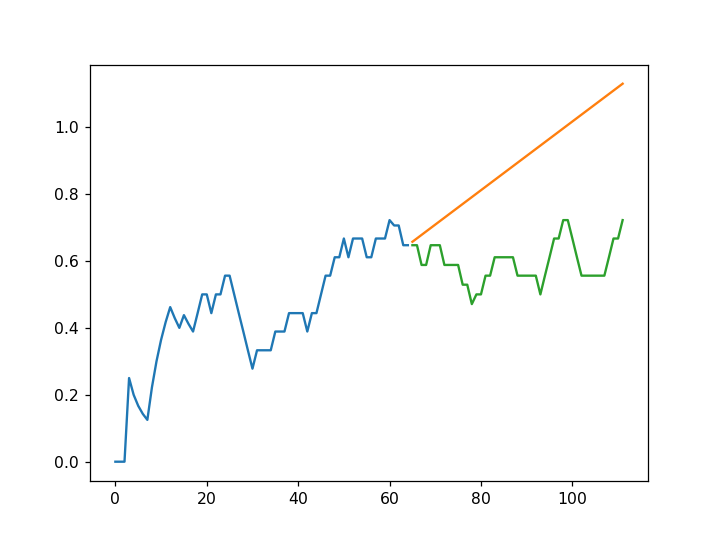

In [34]:
test = wls_KT.loc[65:,['WLS']]
fore = wlsKT_model_fit.forecast(steps=len(wls_KT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_KT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [51]:
# LG 0,1,3 // 2, 0, 0

wlsLG_model = ARIMA(wls_LG.loc[:63, ['WLS']], order=(2, 0, 0))
wlsLG_model_fit = wlsLG_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsLG_model_fit.summary()))

wlsLG_fore = wlsLG_model_fit.forecast(steps=1)
print(wlsLG_fore)


                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   64
Model:                     ARMA(2, 0)   Log Likelihood                  78.638
Method:                       css-mle   S.D. of innovations              0.069
Date:                Thu, 24 Sep 2020   AIC                           -149.276
Time:                        00:36:24   BIC                           -140.640
Sample:                             0   HQIC                          -145.874
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5858      0.062      9.495      0.000       0.465       0.707
ar.L1.WLS      1.5570      0.155     10.048      0.000       1.253       1.861
ar.L2.WLS     -0.7020      0.152     -4.622      0.0

<IPython.core.display.Javascript object>


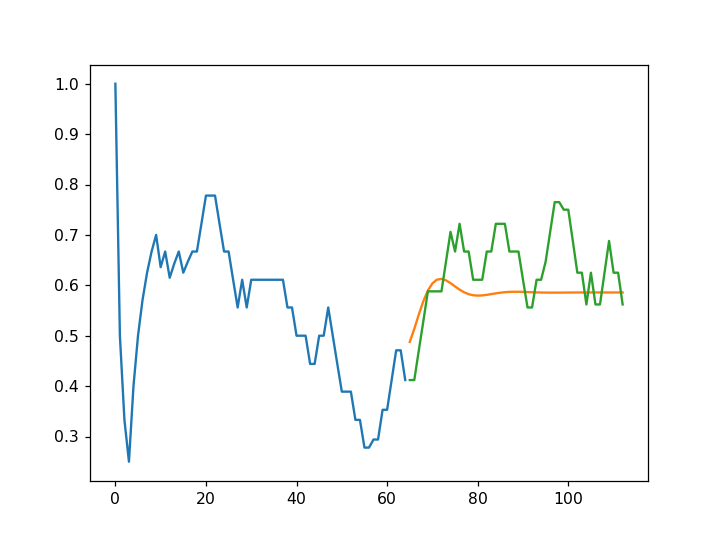

In [52]:
test = wls_LG.loc[65:,['WLS']]
fore = wlsLG_model_fit.forecast(steps=len(wls_LG.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_LG.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [53]:
# 롯데 0, 2, 1// 1,0,3
wlsLT_model = ARIMA(wls_LT.loc[:61, ['WLS']], order=(1, 0, 3))
wlsLT_model_fit = wlsLT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsLT_model_fit.summary()))

wlsLT_fore = wlsLT_model_fit.forecast(steps=1)
print(wlsLT_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   62
Model:                     ARMA(1, 3)   Log Likelihood                 106.565
Method:                       css-mle   S.D. of innovations              0.040
Date:                Thu, 24 Sep 2020   AIC                           -201.131
Time:                        00:37:11   BIC                           -188.368
Sample:                             0   HQIC                          -196.120
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6048      0.118      5.124      0.000       0.373       0.836
ar.L1.WLS      0.9178      0.052     17.788      0.000       0.817       1.019
ma.L1.WLS     -0.0507      0.108     -0.471      0.6

<IPython.core.display.Javascript object>


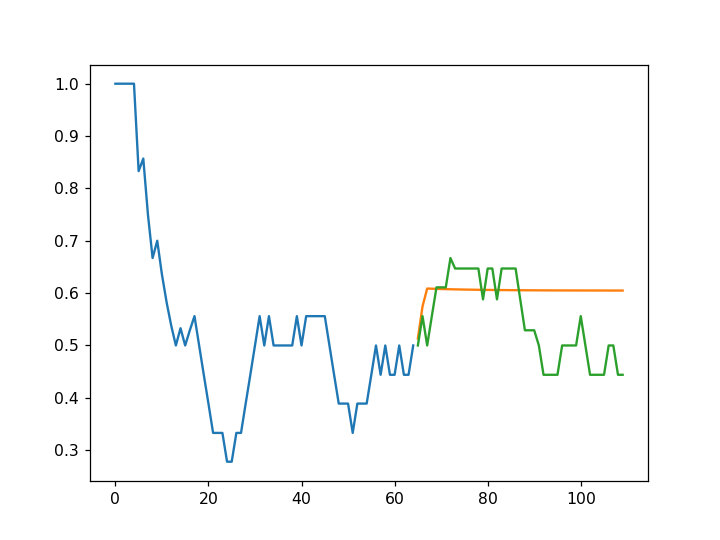

In [54]:
test = wls_LT.loc[65:,['WLS']]
fore = wlsLT_model_fit.forecast(steps=len(wls_LT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_LT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [36]:
# NC 0,1,0//
wlsNC_model = ARIMA(wls_NC.loc[:62, ['WLS']], order=(0, 1, 0))
wlsNC_model_fit = wlsNC_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsNC_model_fit.summary()))

wlsNC_fore = wlsNC_model_fit.forecast(steps=1)
print(wlsNC_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   62
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 106.712
Method:                           css   S.D. of innovations              0.043
Date:                Thu, 24 Sep 2020   AIC                           -209.424
Time:                        01:32:10   BIC                           -205.170
Sample:                             1   HQIC                          -207.754
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0050      0.005     -0.916      0.360      -0.016       0.006

(array([0.68296774]), array([0.04327853]), array([[0.59814338, 0.7677921 ]]))


<IPython.core.display.Javascript object>


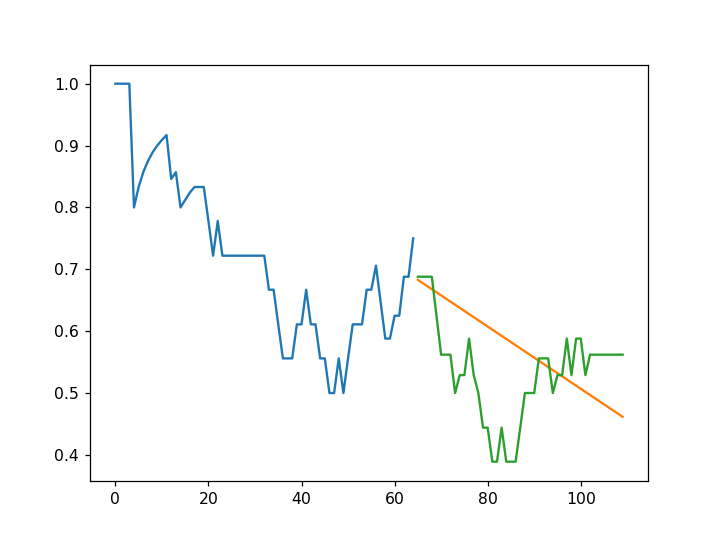

In [37]:
test = wls_NC.loc[65:,['WLS']]
fore = wlsNC_model_fit.forecast(steps=len(wls_NC.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_NC.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [43]:
# OB 0, 0, 1//4,1,1

wlsOB_model = ARIMA(wls_OB.loc[:63, ['WLS']], order=(4,1,1))
wlsOB_model_fit = wlsOB_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(wlsOB_model_fit.summary()))

wlsOB_fore = wlsOB_model_fit.forecast(steps=1)
print(wlsOB_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   63
Model:                 ARIMA(4, 1, 1)   Log Likelihood                  81.033
Method:                       css-mle   S.D. of innovations              0.065
Date:                Thu, 24 Sep 2020   AIC                           -150.067
Time:                        01:32:43   BIC                           -137.208
Sample:                             1   HQIC                          -145.009
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.WLS     0.7912      0.282      2.807      0.005       0.239       1.344
ar.L2.D.WLS    -0.4847      0.195     -2.485      0.013      -0.867      -0.102
ar.L3.D.WLS     0.8610      0.176      4.886    

<IPython.core.display.Javascript object>


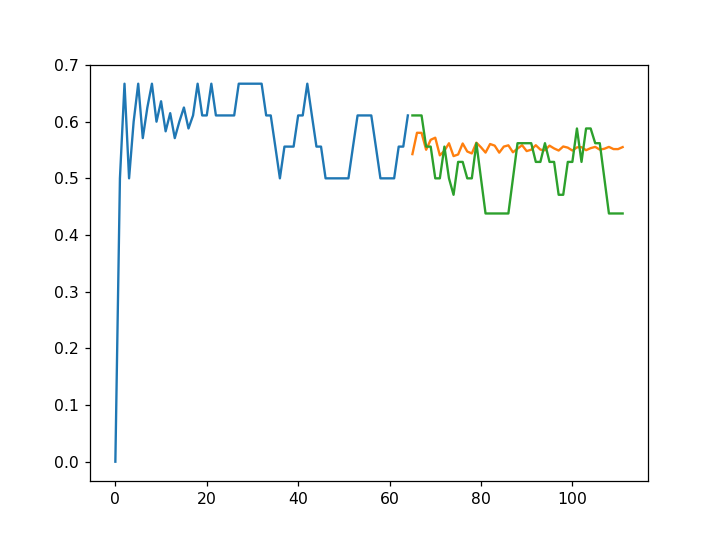

In [44]:
test = wls_OB.loc[65:,['WLS']]
fore = wlsOB_model_fit.forecast(steps=len(wls_OB.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_OB.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [62]:
# SK 0,1,0//

wlsSK_model = ARIMA(wls_SK.loc[:64, ['WLS']], order=(0, 1, 0))
wlsSK_model_fit = wlsSK_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsSK_model_fit.summary()))

wlsSK_fore = wlsSK_model_fit.forecast(steps=1)
print(wlsSK_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  74.657
Method:                           css   S.D. of innovations              0.075
Date:                Thu, 24 Sep 2020   AIC                           -145.315
Time:                        00:42:00   BIC                           -140.997
Sample:                             1   HQIC                          -143.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.009      0.645      0.519      -0.012       0.025

(array([0.39507813]), array([0.07536128]), array([[0.24737274, 0.54278351]]))


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>


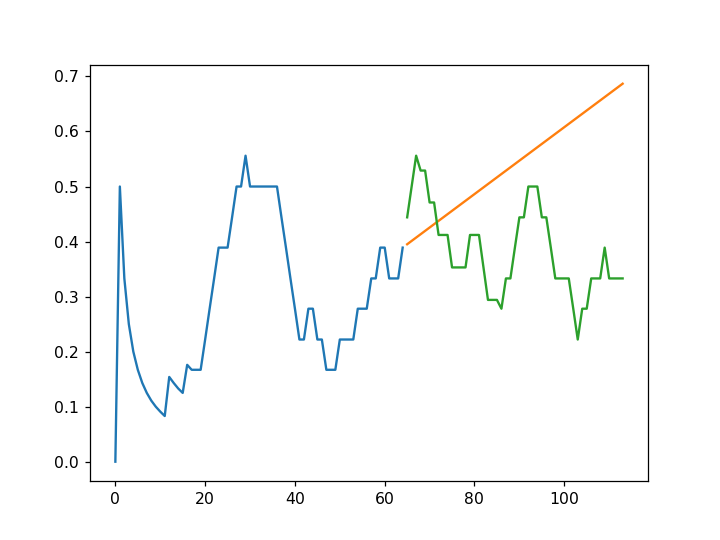

In [63]:
test = wls_SK.loc[65:,['WLS']]
fore = wlsSK_model_fit.forecast(steps=len(wls_SK.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_SK.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [65]:
# 삼성 2,1,2 // 0,1,0 
wlsSS_model = ARIMA(wls_SS.loc[:64, ['WLS']], order=(0,1,0))
wlsSS_model_fit = wlsSS_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsSS_model_fit.summary()))

wlsSS_fore = wlsSS_model_fit.forecast(steps=1)
print(wlsSS_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  97.571
Method:                           css   S.D. of innovations              0.053
Date:                Thu, 24 Sep 2020   AIC                           -191.142
Time:                        00:43:01   BIC                           -186.824
Sample:                             1   HQIC                          -189.441
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.007      1.319      0.187      -0.004       0.022

(array([0.5646875]), array([0.05268179]), array([[0.46143309, 0.66794191]]))


<IPython.core.display.Javascript object>


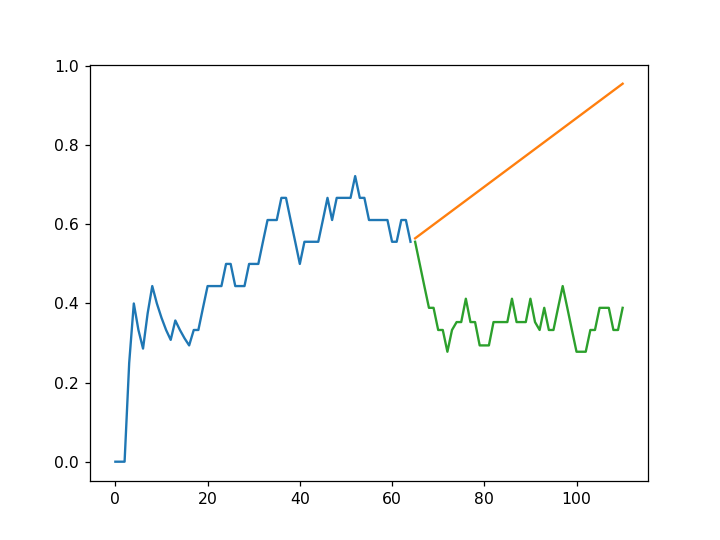

In [66]:
test = wls_SS.loc[65:,['WLS']]
fore = wlsSS_model_fit.forecast(steps=len(wls_SS.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_SS.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [67]:
# 키움 1,0,0//
wlsWO_model = ARIMA(wls_WO.loc[:64, ['WLS']], order=(1, 0, 0))
wlsWO_model_fit = wlsWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsWO_model_fit.summary()))

wlsWO_fore = wlsWO_model_fit.forecast(steps=1)
print(wlsWO_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                  91.626
Method:                       css-mle   S.D. of innovations              0.058
Date:                Thu, 24 Sep 2020   AIC                           -177.252
Time:                        00:43:49   BIC                           -170.729
Sample:                             0   HQIC                          -174.678
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6635      0.094      7.032      0.000       0.479       0.848
ar.L1.WLS      0.9345      0.051     18.404      0.000       0.835       1.034
                                    Roots           

<IPython.core.display.Javascript object>


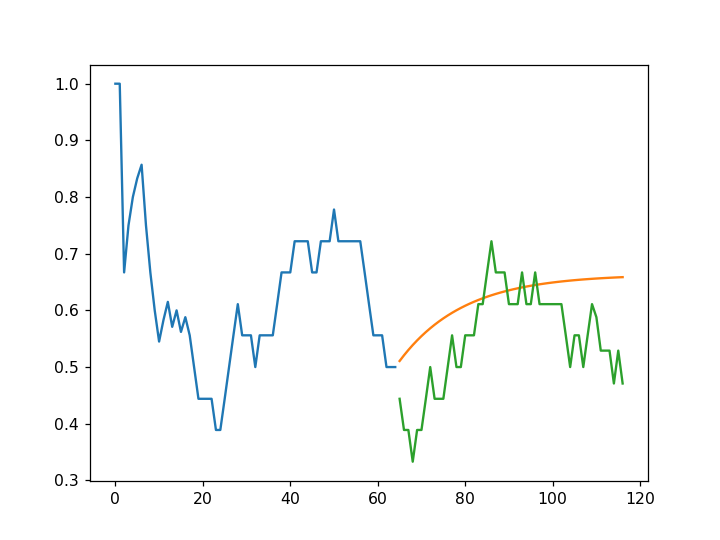

In [68]:
test = wls_WO.loc[65:,['WLS']]
fore = wlsWO_model_fit.forecast(steps=len(wls_WO.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_WO.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

## BA ARIMA

--BA-- <br> 
HH 3,1,0 // HH 2,0,2<br>
HT 0,1,0 // HT 1,0,2 <br>
KT 1,0,2 // KT 2,1,0<br>
LG 3,1,0 // LG 2,0,0 <br>
LT 1,1,0 // LT 2,0,4 <br>
NC 0,2,1 // NC 1,0,0<br>
OB 1,0,1 // OB 1,0,4 <br>
SK 2,1,0 // SK 2,1,0 <br>
SS 0,2,1 // SS 0,2,1<br>
WO 0,1,0 // WO 0,1,0<br>

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(2, 2)   Log Likelihood                 218.718
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -425.437
Time:                        19:54:39   BIC                           -412.391
Sample:                             0   HQIC                          -420.289
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2382      0.010     24.669      0.000       0.219       0.257
ar.L1.BA       0.2343      0.238      0.983      0.326      -0.233       0.701
ar.L2.BA       0.6310      0.231      2.732      0.0

<IPython.core.display.Javascript object>


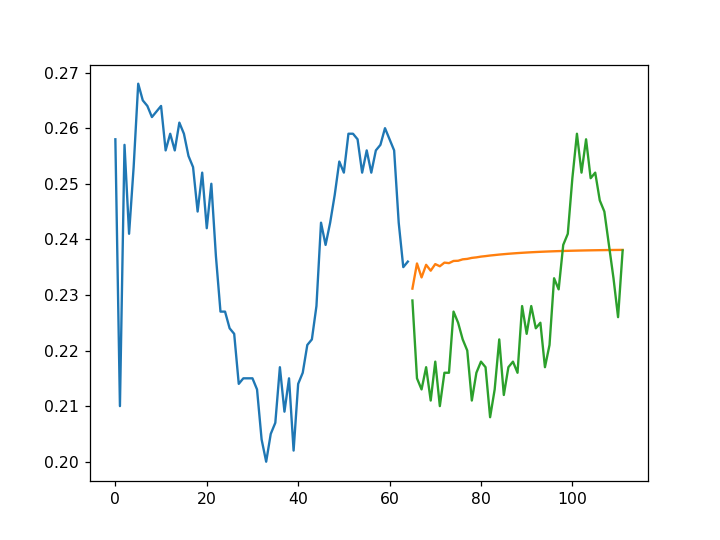

In [11]:
baHH_model = ARIMA(ba_HH.loc[:64, ['BA']], order=(2, 0, 2))
baHH_model_fit = baHH_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baHH_model_fit.summary()))

test = ba_HH.loc[65:,['BA']]
fore = baHH_model_fit.forecast(steps=len(ba_HH.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HH.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 192.570
Method:                       css-mle   S.D. of innovations              0.012
Date:                Thu, 24 Sep 2020   AIC                           -377.139
Time:                        19:54:52   BIC                           -368.504
Sample:                             1   HQIC                          -373.737
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.2662      0.178      1.498      0.134      -0.082       0.615
ma.L1.D.BA    -0.2836      0.113     -2.501      0.012      -0.506      -0.061
ma.L2.D.BA    -0.7164      0.115     -6.204      0.0

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<IPython.core.display.Javascript object>


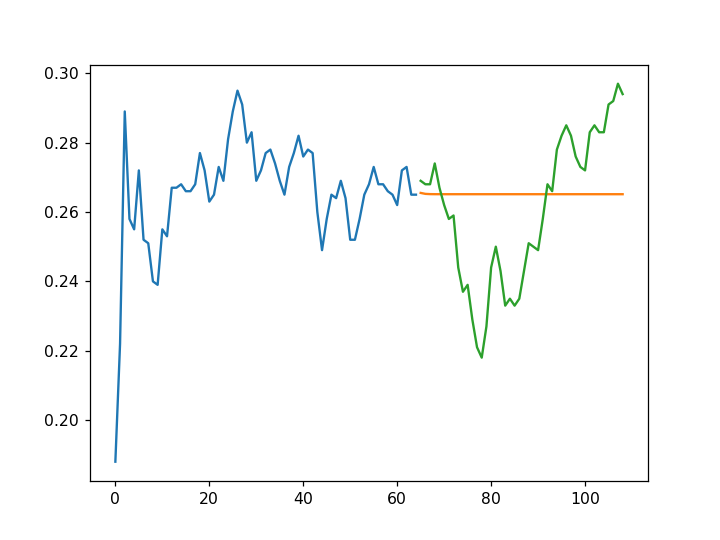

In [12]:
baHT_model = ARIMA(ba_HT.loc[:64, ['BA']], order=(1, 1, 2)) # 정상성 떄문에 1,0,2 -> 1,1,2 변경
baHT_model_fit = baHT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baHT_model_fit.summary()))

test = ba_HT.loc[65:,['BA']]
fore = baHT_model_fit.forecast(steps=len(ba_HT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 194.293
Method:                           css   S.D. of innovations              0.012
Date:                Thu, 24 Sep 2020   AIC                           -384.587
Time:                        19:55:28   BIC                           -380.269
Sample:                             1   HQIC                          -382.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.355      0.175      -0.001       0.005



<IPython.core.display.Javascript object>


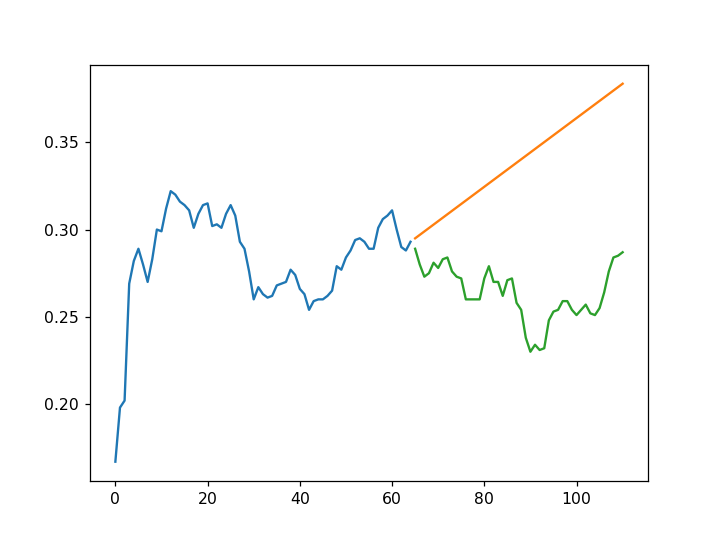

In [13]:
baKT_model = ARIMA(ba_KT.loc[:64, ['BA']], order=(0, 1, 0))
baKT_model_fit = baKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baKT_model_fit.summary()))

test = ba_KT.loc[65:,['BA']]
fore = baKT_model_fit.forecast(steps=len(ba_KT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_KT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(2, 2)   Log Likelihood                 218.718
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -425.437
Time:                        19:55:53   BIC                           -412.391
Sample:                             0   HQIC                          -420.289
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2382      0.010     24.669      0.000       0.219       0.257
ar.L1.BA       0.2343      0.238      0.983      0.326      -0.233       0.701
ar.L2.BA       0.6310      0.231      2.732      0.0

<IPython.core.display.Javascript object>


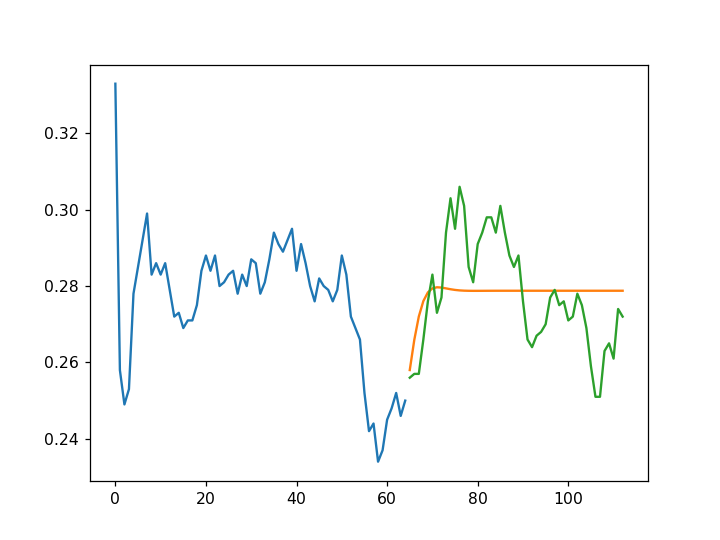

In [14]:
baLG_model = ARIMA(ba_LG.loc[:64, ['BA']], order=(2, 0, 0))
baLG_model_fit = baLG_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baHH_model_fit.summary()))

test = ba_LG.loc[65:,['BA']]
fore = baLG_model_fit.forecast(steps=len(ba_LG.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LG.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 213.193
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 24 Sep 2020   AIC                           -416.386
Time:                        19:56:06   BIC                           -405.591
Sample:                             1   HQIC                          -412.133
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA    -0.8065      0.251     -3.211      0.001      -1.299      -0.314
ar.L2.D.BA     0.1242      0.226      0.550      0.582      -0.318       0.567
ma.L1.D.BA     1.4597      0.204      7.168      0.0

<IPython.core.display.Javascript object>


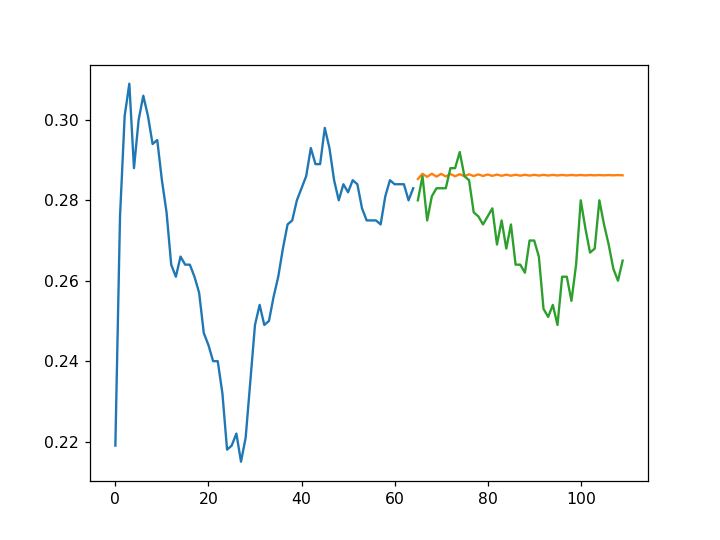

In [15]:
baLT_model = ARIMA(ba_LT.loc[:64, ['BA']], order=(2, 1, 2)) #정상성 떄문에 2,0,4 -> 2,1,2 변경
baLT_model_fit = baLT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baLT_model_fit.summary()))

test = ba_LT.loc[65:,['BA']]
fore = baLT_model_fit.forecast(steps=len(ba_LT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                 223.495
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -440.990
Time:                        19:56:24   BIC                           -434.467
Sample:                             0   HQIC                          -438.416
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2644      0.024     10.814      0.000       0.216       0.312
ar.L1.BA       0.9703      0.030     32.632      0.000       0.912       1.029
                                    Roots           

<IPython.core.display.Javascript object>


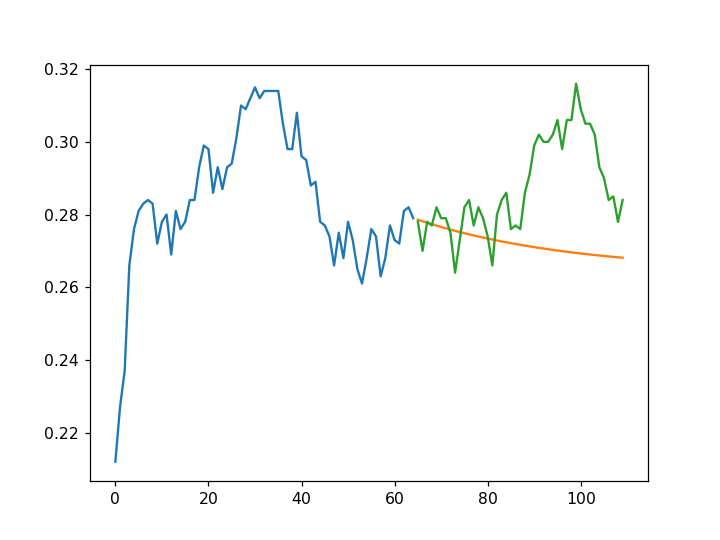

In [16]:
baNC_model = ARIMA(ba_NC.loc[:64, ['BA']], order=(1, 0, 0))
baNC_model_fit = baNC_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baNC_model_fit.summary()))

test = ba_NC.loc[65:,['BA']]
fore = baNC_model_fit.forecast(steps=len(ba_NC.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_NC.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   65
Model:                     ARMA(1, 4)   Log Likelihood                 201.560
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 24 Sep 2020   AIC                           -389.120
Time:                        19:56:38   BIC                           -373.899
Sample:                             0   HQIC                          -383.115
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2858      0.012     24.778      0.000       0.263       0.308
ar.L1.BA       0.6743      0.176      3.826      0.000       0.329       1.020
ma.L1.BA       0.6110      0.167      3.658      0.0

<IPython.core.display.Javascript object>


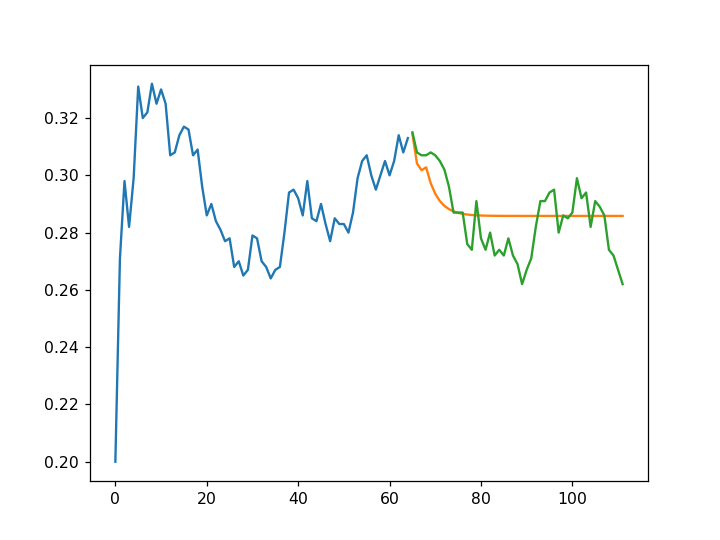

In [17]:
baOB_model = ARIMA(ba_OB.loc[:64, ['BA']], order=(1, 0, 4))
baOB_model_fit = baOB_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baOB_model_fit.summary()))

test = ba_OB.loc[65:,['BA']]
fore = baOB_model_fit.forecast(steps=len(ba_OB.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_OB.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 187.846
Method:                       css-mle   S.D. of innovations              0.013
Date:                Thu, 24 Sep 2020   AIC                           -369.693
Time:                        19:56:50   BIC                           -363.216
Sample:                             1   HQIC                          -367.141
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.9874      0.138      7.178      0.000       0.718       1.257
ar.L2.D.BA    -0.4454      0.195     -2.281      0.023      -0.828      -0.063
                                    Roots           

<IPython.core.display.Javascript object>


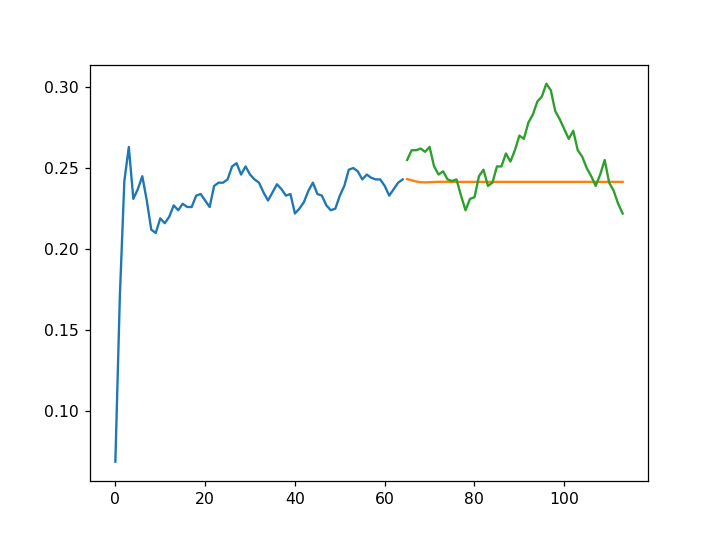

In [18]:
baSK_model = ARIMA(ba_SK.loc[:64, ['BA']], order=(2, 1, 0))
baSK_model_fit = baSK_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSK_model_fit.summary()))

test = ba_SK.loc[65:,['BA']]
fore = baSK_model_fit.forecast(steps=len(ba_SK.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SK.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                  D2.BA   No. Observations:                   63
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 210.485
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 24 Sep 2020   AIC                           -416.970
Time:                        19:57:01   BIC                           -412.684
Sample:                             2   HQIC                          -415.284
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.BA    -0.8378      0.076    -11.040      0.000      -0.987      -0.689
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


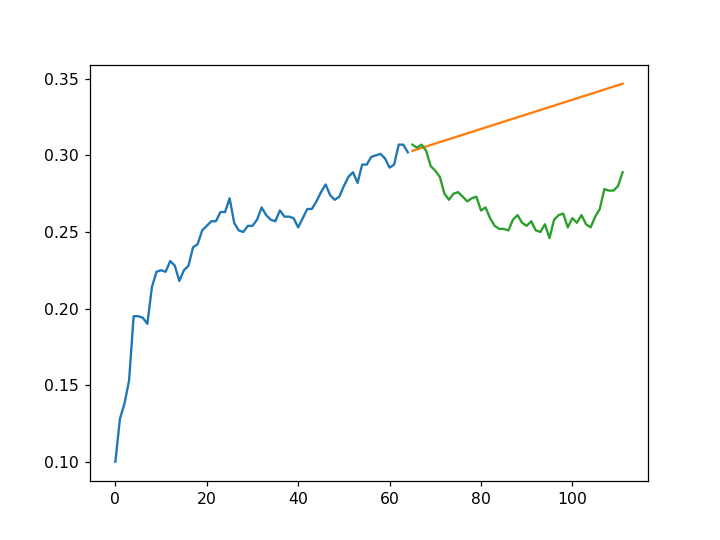

In [19]:
baSS_model = ARIMA(ba_SS.loc[:64, ['BA']], order=(0, 2, 1))
baSS_model_fit = baSS_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSS_model_fit.summary()))

test = ba_SS.loc[65:,['BA']]
fore = baSS_model_fit.forecast(steps=len(ba_SS.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SS.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 209.084
Method:                           css   S.D. of innovations              0.009
Date:                Thu, 24 Sep 2020   AIC                           -414.168
Time:                        19:57:13   BIC                           -409.851
Sample:                             1   HQIC                          -412.467
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.434      0.665      -0.003       0.002



<IPython.core.display.Javascript object>


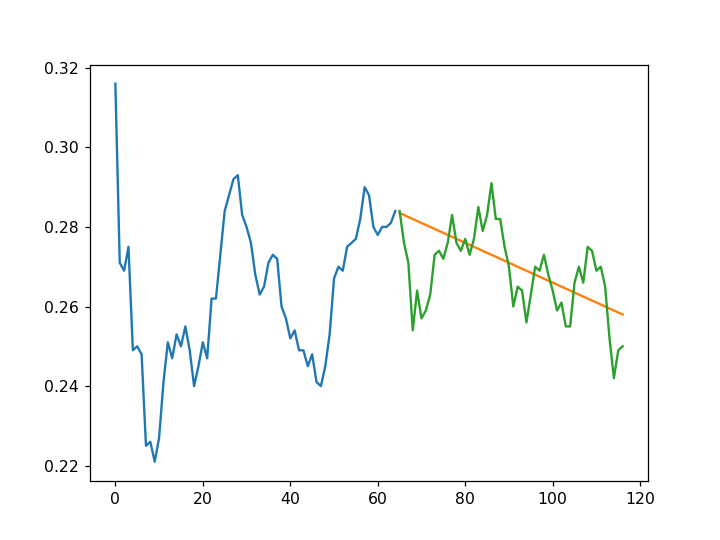

In [20]:
baWO_model = ARIMA(ba_WO.loc[:64, ['BA']], order=(0, 1, 0))
baWO_model_fit = baWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baWO_model_fit.summary()))

test = ba_WO.loc[65:,['BA']]
fore = baWO_model_fit.forecast(steps=len(ba_WO.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_WO.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()